In [1]:
import pandas as pd, numpy as np, re, time
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [10]:
# Loading data from json file
data = pd.read_csv("ACL_FINAL_Data.csv")

In [11]:
data.head(15)

,Unnamed: 0,tweet,target
0,251,i feel guilty i wont be able to give this litt...,0
1,2295,There’s no point in even trying anymore. It’s ...,1
2,918,i was taught to complain and feel unhappy but ...,0
3,1990,There are probably serial killers who sleep ea...,1
4,1241,"His brown , nearly auburn hair clung to his sc...",0
5,1724,im feeling like the lunches are dull,0
6,726,i feel rotten but no amount of suggesting that...,0
7,1242,I am sad because some relations to friends are...,0
8,1132,The loss of a person I loved very much is some...,0
9,706,i forgive myself that i have accepted and allo...,0


In [12]:
data.rename(columns = {'tweet':'Text', 'target':'Label',
                              't20':'T20'}, inplace = True)

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

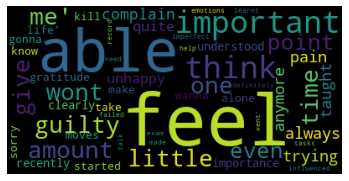

In [14]:
text = data['Text'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

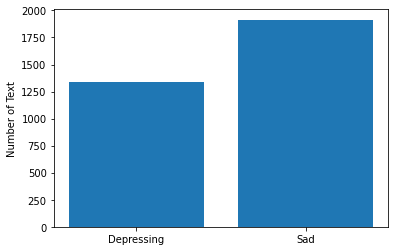

In [16]:
#Visualization
sh=0
for i in range(len(data["Label"])):
    if data["Label"].iloc[i]==1:
        sh+=1
normal=len(data["Label"])-sh
label_values={"Depressing" : sh, "Sad" : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Text")
plt.show()

In [17]:
print("No. of Label 1 tweets")
print(len(data[data["Label"].isin([1])]))
print("No. of Label 0 tweets")
print(len(data[data["Label"].isin([0])]))
print("Class Balance Ratio")
print((len(data[data["Label"].isin([1])]))/len(data))

No. of Label 1 tweets
1342
No. of Label 0 tweets
1914
Class Balance Ratio
0.41216216216216217


In [18]:
# Getting features and labels
features = data['Text']
labels = data['Label']

In [19]:
# Stemming our data
ps = PorterStemmer()
features = features.apply(lambda x: x.split())
features = features.apply(lambda x : ' '.join([ps.stem(word) for word in x]))

In [20]:
# Vectorizing the data with maximum of 5000 features
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 5000)
features = list(features)
features = tv.fit_transform(features).toarray()

In [21]:
# Getting training and testing data
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

In [22]:
# Using linear support vector classifier
lsvc = LinearSVC()
# training the model
lsvc.fit(features_train, labels_train)
# getting the score of train and test data
print(lsvc.score(features_train, labels_train)) 
print(lsvc.score(features_test, labels_test))
y_pred = lsvc.predict(features_test)
print ("Loss")

0.9903993855606759
0.9049079754601227
Loss


In [23]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.9024253659290156
0.9049079754601227
0.9047170054961914
[0.91798942 0.88686131]
0.8868613138686132


In [24]:

from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.9009541030277383
0.9049079754601227
0.9049079754601227
[0.92780749 0.87410072]
[0.92780749 0.87410072]


In [25]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.9041884816753927
0.9049079754601227
0.9048051906337327
[0.90837696 0.9       ]
[0.90837696 0.9       ]


In [26]:
# Using Gaussuan Naive Bayes
gnb = GaussianNB()
gnb.fit(features_train, labels_train)
print(gnb.score(features_train, labels_train))  
print(gnb.score(features_test, labels_test))
y_pred = gnb.predict(features_test)

0.8759600614439325
0.7193251533742331


In [27]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.719292797402689
0.7193251533742331
0.7197365364410077
[0.72230653 0.71627907]
0.7162790697674419


In [28]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.7336494440810988
0.7193251533742331
0.7193251533742331
[0.63636364 0.83093525]
[0.63636364 0.83093525]


In [29]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.7322577561068885
0.7193251533742331
0.7473983641841436
[0.83508772 0.62942779]
[0.83508772 0.62942779]


In [30]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(features_train, labels_train)
print(lr.score(features_train, labels_train))  
print(lr.score(features_test, labels_test))
y_pred = lr.predict(features_test)

0.9412442396313364
0.9033742331288344


In [31]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.9000445317233776
0.9033742331288344
0.9027306773950067
[0.91828794 0.88180113]
0.8818011257035647


In [32]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.8959239025891585
0.9033742331288344
0.9033742331288344
[0.94652406 0.84532374]
[0.94652406 0.84532374]


In [33]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.9066281424408554
0.9033742331288344
0.9044283164270946
[0.89168766 0.92156863]
[0.89168766 0.92156863]


In [34]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
rfc.fit(features_train, labels_train)
print(rfc.score(features_train, labels_train)) 
print(rfc.score(features_test, labels_test))
y_pred = lr.predict(features_test)

0.9934715821812596
0.9033742331288344


In [35]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.9000445317233776
0.9033742331288344
0.9027306773950067
[0.91828794 0.88180113]
0.8818011257035647


In [36]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.8959239025891585
0.9033742331288344
0.9033742331288344
[0.94652406 0.84532374]
[0.94652406 0.84532374]


In [37]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.9066281424408554
0.9033742331288344
0.9044283164270946
[0.89168766 0.92156863]
[0.89168766 0.92156863]


In [38]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(features_train, labels_train)
print(clf.score(features_test, labels_test))
y_pred = clf.predict(features_test)

0.8834355828220859


In [39]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.8807412755716004
0.8834355828220859
0.883380596959831
[0.89866667 0.86281588]
0.8628158844765342


In [40]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.8803908744662025
0.8834355828220859
0.8834355828220859
[0.90106952 0.85971223]
[0.90106952 0.85971223]


In [41]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.881109312365094
0.8834355828220859
0.8833425320038062
[0.8962766  0.86594203]
[0.8962766  0.86594203]


In [42]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(features_train, labels_train)
print(neigh.score(features_test, labels_test))
y_pred = neigh.predict(features_test)

0.7883435582822086


In [43]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.7882459261769607
0.7883435582822086
0.7889154034700893
[0.79279279 0.78369906]
0.7836990595611285


In [44]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.8025814642403724
0.7883435582822086
0.7883435582822086
[0.70588235 0.89928058]
[0.70588235 0.89928058]


In [45]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.7992770167427701
0.7883435582822086
0.8147124875106216
[0.90410959 0.69444444]
[0.90410959 0.69444444]


In [46]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0).fit(features_train, labels_train)
print(clf.score(features_test, labels_test))
y_pred = clf.predict(features_test)

0.8895705521472392


In [47]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.8874255402825872
0.8895705521472392
0.8897135529382161
[0.90296496 0.87188612]
0.8718861209964412


In [48]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.8885084445812335
0.8895705521472392
0.8895705521472392
[0.89572193 0.88129496]
[0.89572193 0.88129496]


In [49]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.886501071647275
0.8895705521472392
0.8900090493615199
[0.91032609 0.86267606]
[0.91032609 0.86267606]


In [50]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(features_train, labels_train)
print(clf.score(features_test, labels_test))
y_pred = clf.predict(features_test)

0.8803680981595092


In [51]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.8773667711598746
0.8803680981595092
0.8801915495124719
[0.89655172 0.85818182]
0.8581818181818183


In [52]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.876332089408687
0.8803680981595092
0.8803680981595092
[0.90374332 0.84892086]
[0.90374332 0.84892086]


In [53]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.8785603715170278
0.8803680981595092
0.880167239643678
[0.88947368 0.86764706]
[0.88947368 0.86764706]


In [54]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000, tol=1e-3).fit(features_train, labels_train)
print(clf.score(features_test, labels_test))
y_pred = clf.predict(features_test)

0.911042944785276


In [55]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.9086278716885577
0.911042944785276
0.9108151077006801
[0.92348285 0.89377289]
0.8937728937728937


In [56]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.9067633593659832
0.911042944785276
0.911042944785276
[0.93582888 0.87769784]
[0.93582888 0.87769784]


In [57]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.9109530472636815
0.911042944785276
0.9110274452125873
[0.91145833 0.91044776]
[0.91145833 0.91044776]
